# Test et Visualisation des Métriques Avancées

Ce notebook permet de tester et visualiser toutes les nouvelles métriques avancées :
- Embeddings et similarité sémantique
- Métriques avancées (perplexité, diversité lexicale)
- Graphes sémantiques enrichis
- Visualisations


## 1. Imports et Configuration


In [1]:
import sys
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, str(Path.cwd() / "src"))

from src.comparison.helpers import compute_metrics
from src.semantic.graph_visualization import visualize_semantic_graph
from src.semantic.graph_builder import expand_graph_with_embeddings

plt.style.use('default')
%matplotlib inline


In [2]:
try:
    from src.evaluation.llm_judge import (
        load_poems_from_results,
        evaluate_poem_with_gemini,
        evaluate_all_poems_from_results
    )
    import os
    try:
        from dotenv import load_dotenv
        load_dotenv()
    except ImportError:
        print("python-dotenv non installé - utilisez: pip install python-dotenv")
except ImportError as e:
    print(f"Module LLM juge non disponible: {e}")
    import os
    try:
        from dotenv import load_dotenv
        load_dotenv()
        print("Fichier .env chargé (si présent)")
    except ImportError:
        pass


## 2. Test des Métriques de Base


In [ ]:

poem_test = """Dans l'infini des étoiles, je me perds,
Le silence cosmique m'enveloppe,
Car voilà les mystères, les lueurs lointaines,
Qui m'attirent, malgré la solitude."""

metrics_basic = compute_metrics(poem_test)
print("Métriques de base calculées:")
for key, value in metrics_basic.items():
    print(f"  {key}: {value}")

Métriques de base calculées:
  word_count: 23
  line_count: 4
  char_count: 155
  vocab_size: 22
  avg_line_length: 38.0


## 3. Test des Métriques Avancées avec Graphe Thématique


In [ ]:

topic_graph = {
    "nodes": [
            "étoiles",
            "infini",
            "silence cosmique",
            "exploration",
            "nostalgie terrestre",
            "découverte",
            "solitude",
            "émerveillement",
            "mystère",
            "temps"
        ],
        "edges": [
            ["étoiles", "infini"],
            ["infini", "silence cosmique"],
            ["silence cosmique", "solitude"],
            ["solitude", "nostalgie terrestre"],
            ["nostalgie terrestre", "exploration"],
            ["exploration", "découverte"],
            ["découverte", "émerveillement"],
            ["émerveillement", "mystère"],
            ["mystère", "temps"],
            ["temps", "étoiles"],
            ["exploration", "silence cosmique"],
            ["découverte", "infini"],
            ["solitude", "émerveillement"]
        ]
}

print("Graphe thématique:")
print(f"  Nœuds: {topic_graph['nodes']}")
print(f"  Arêtes: {topic_graph['edges']}")


Graphe thématique:
  Nœuds: ['étoiles', 'infini', 'silence cosmique', 'exploration', 'nostalgie terrestre', 'découverte', 'solitude', 'émerveillement', 'mystère', 'temps']
  Arêtes: [['étoiles', 'infini'], ['infini', 'silence cosmique'], ['silence cosmique', 'solitude'], ['solitude', 'nostalgie terrestre'], ['nostalgie terrestre', 'exploration'], ['exploration', 'découverte'], ['découverte', 'émerveillement'], ['émerveillement', 'mystère'], ['mystère', 'temps'], ['temps', 'étoiles'], ['exploration', 'silence cosmique'], ['découverte', 'infini'], ['solitude', 'émerveillement']]


In [ ]:

poem_advanced = """Dans l'infini des étoiles, où je me retrouve,
Le silence cosmique m'enveloppe, sans violence,
Car voilà les mystères, les lueurs lointaines,
Qui m'attirent, malgré la solitude profonde.

L'exploration des cieux, qui m'appelle,
Et des découvertes, qui me regardent, si vastes,
Les étoiles de l'émerveillement, qui se révèlent
Rêveur d'infini, et des mystères qui ne s'arrêtent.

Mais dans l'espace, où j'essaye de plonger,
Je trouve la découverte, je trouve l'émerveillement,
Car dans le temps, je trouve la nostalgie terrestre,
Et dans les étoiles, je trouve l'infini."""


metrics_advanced = compute_metrics(poem_advanced, topic_graph)

print("\nMétriques calculées")
print(f"\nMétriques de base ({len([k for k in metrics_advanced.keys() if k in ['word_count', 'line_count', 'char_count', 'vocab_size', 'avg_line_length']])}):")
for key in ['word_count', 'line_count', 'char_count', 'vocab_size', 'avg_line_length']:
    if key in metrics_advanced:
        print(f"  {key}: {metrics_advanced[key]}")

print(f"\nMétriques embeddings ({len([k for k in metrics_advanced.keys() if 'graph' in k or 'coherence' in k])}):")
for key in ['graph_mean_similarity', 'graph_max_similarity', 'graph_min_similarity', 'graph_coverage', 
            'mean_consecutive_similarity', 'overall_coherence', 'coherence_std']:
    if key in metrics_advanced:
        print(f"  {key}: {metrics_advanced[key]:.4f}")

print(f"\nMétriques avancées ({len([k for k in metrics_advanced.keys() if k in ['perplexity', 'type_token_ratio', 'lexical_richness']])}):")
for key in ['perplexity', 'type_token_ratio', 'unique_word_ratio', 'lexical_richness']:
    if key in metrics_advanced:
        print(f"  {key}: {metrics_advanced[key]:.4f}")


Métriques calculées

Métriques de base (5):
  word_count: 85
  line_count: 12
  char_count: 568
  vocab_size: 51
  avg_line_length: 46.25

Métriques embeddings (6):
  graph_mean_similarity: 0.1274
  graph_max_similarity: 0.2836
  graph_min_similarity: 0.0886
  graph_coverage: 0.0000
  mean_consecutive_similarity: 0.7200
  overall_coherence: 0.6998
  coherence_std: 0.0353

Métriques avancées (3):
  perplexity: 94.0860
  type_token_ratio: 0.6000
  unique_word_ratio: 0.6000
  lexical_richness: 60.0000


## 4. Visualisation du Graphe Sémantique


In [ ]:

print("Visualisation du graphe thématique...")

viz_dir = Path("results/visualizations/graphs")
viz_dir.mkdir(parents=True, exist_ok=True)
save_path = str(viz_dir / "graph_thematique.png")
visualize_semantic_graph(topic_graph, save_path=save_path)
print(f"✓ Graphe sauvegardé dans {save_path}")


Visualisation du graphe thématique...
Graphe sauvegardé dans results/visualizations/graphs/graph_thematique.png
✓ Graphe sauvegardé dans results/visualizations/graphs/graph_thematique.png


## 5. Expansion du Graphe avec Embeddings


In [ ]:
print("Expansion du graphe avec embeddings...")
print("(Peut prendre du temps pour charger le modèle)")

expanded_graph = expand_graph_with_embeddings(topic_graph, top_k=5)

if "expanded_nodes" in expanded_graph:
    print("\n=== Graphe enrichi ===")
    all_similarities_identical = True
    for node, data in expanded_graph["expanded_nodes"].items():
        lexical_field = data.get("lexical_field", [])
        similarities = data.get("similarities", [])
        if lexical_field:
            print(f"\n{node}:")
            unique_sims = set(similarities)
            if len(unique_sims) > 1:
                all_similarities_identical = False
            for word, sim in zip(lexical_field, similarities):
                print(f"  - {word} (similarité: {sim:.3f})")
    
    has_similarities = any(
        data.get("similarities") 
        for data in expanded_graph["expanded_nodes"].values()
    )
    if has_similarities:
        if all_similarities_identical:
            print("\n⚠ Attention: Toutes les similarités sont identiques. Le problème persiste.")
        else:
            print("\n✓ Les similarités sont variées - correction des embeddings fonctionne!")


Expansion du graphe avec embeddings...
(Peut prendre du temps pour charger le modèle)

=== Graphe enrichi ===

étoiles:
  - horizon (similarité: 0.832)
  - lune (similarité: 0.828)
  - éternité (similarité: 0.823)
  - isolement (similarité: 0.816)
  - émerveillement (similarité: 0.812)

infini:
  - horizon (similarité: 0.832)
  - lune (similarité: 0.828)
  - éternité (similarité: 0.823)
  - isolement (similarité: 0.816)
  - émerveillement (similarité: 0.813)

silence cosmique:
  - obscurité (similarité: 0.446)
  - cosmos (similarité: 0.440)
  - éternité (similarité: 0.401)
  - émerveillement (similarité: 0.396)
  - isolement (similarité: 0.394)

exploration:
  - horizon (similarité: 0.832)
  - lune (similarité: 0.828)
  - éternité (similarité: 0.823)
  - isolement (similarité: 0.816)
  - émerveillement (similarité: 0.812)

nostalgie terrestre:
  - cosmos (similarité: 0.516)
  - sol (similarité: 0.516)
  - union (similarité: 0.516)
  - mer (similarité: 0.516)
  - distance (similarité: 0

## 6. Analyse des Résultats Existants


In [ ]:
results_dir = Path("results/comparison")
json_files = sorted(results_dir.glob("comparison_*.json"), 
                    key=lambda p: p.stat().st_mtime, reverse=True)

if json_files:
    results_file = json_files[0]
    with open(results_file, "r", encoding="utf-8") as f:
        existing_data = json.load(f)
    
    print(f"✓ Fichier de résultats chargé: {results_file.name}")
    print(f"  Timestamp: {existing_data.get('timestamp', 'N/A')}")
    print(f"  Nombre d'approches: {len(existing_data.get('approaches', {}))}")
    
    topic_graph_existing = existing_data["config"]["topic_graph"]
else:
    print("⚠ Aucun fichier de résultats trouvé dans results/comparison/")
    existing_data = None


✓ Fichier de résultats chargé: comparison_enriched.json
  Timestamp: 20260113_185353
  Nombre d'approches: 4


In [ ]:
if existing_data:
    print("Recalcul des métriques avec les nouvelles fonctionnalités...")
    print("(Peut prendre du temps pour charger les modèles)")
    
    results_comparison = {}
    
    for approach_name, approach_data in existing_data["approaches"].items():
        poem = approach_data["poem"]
        print(f"\n{approach_name}...")
        
        new_metrics = compute_metrics(poem, topic_graph_existing)
        results_comparison[approach_name] = {
            "description": approach_data["description"],
            "poem": poem,
            "old_metrics": approach_data["metrics"],
            "new_metrics": new_metrics
        }
    
    print("\nToutes les métriques recalculées")


Recalcul des métriques avec les nouvelles fonctionnalités...
(Peut prendre du temps pour charger les modèles)

baseline...

structure_only...

specialization_only...

structure_specialization...

Toutes les métriques recalculées


## 7. Visualisation Comparative des Métriques


In [ ]:
if existing_data and 'results_comparison' in locals():
    comparison_data = []
    
    for approach_name, data in results_comparison.items():
        row = {"Approche": data["description"]}
        metrics = data["new_metrics"]
        
        row["Mots"] = metrics.get("word_count", 0)
        row["Lignes"] = metrics.get("line_count", 0)
        row["Vocabulaire"] = metrics.get("vocab_size", 0)
        
        row["Similarité graphe (moy)"] = metrics.get("graph_mean_similarity", 0)
        row["Similarité graphe (max)"] = metrics.get("graph_max_similarity", 0)
        row["Cohérence globale"] = metrics.get("overall_coherence", 0)
        
        row["Perplexité"] = metrics.get("perplexity", 0)
        row["Diversité lexicale"] = metrics.get("type_token_ratio", 0)
        
        comparison_data.append(row)
    
    df_comparison = pd.DataFrame(comparison_data)
    
    print("=== Tableau Comparatif ===")
    print(df_comparison.to_string(index=False))
else:
    print("Données de comparaison non disponibles")


=== Tableau Comparatif ===
                            Approche  Mots  Lignes  Vocabulaire  Similarité graphe (moy)  Similarité graphe (max)  Cohérence globale  Perplexité  Diversité lexicale
    Modèle générique + prompt simple   158      15           89                -0.018581                -0.017643           0.386453   78.539171            0.560510
Modèle générique + graphe thématique   124      15           71                 0.082958                 0.084477           0.384701   88.807072            0.569106
    Modèle fine-tuné + prompt simple   143      17           82                 0.003740                 0.004066           0.426511   89.154996            0.574468
Modèle fine-tuné + graphe thématique   107      15           36                 0.031893                 0.032399           0.705906   79.135082            0.336449


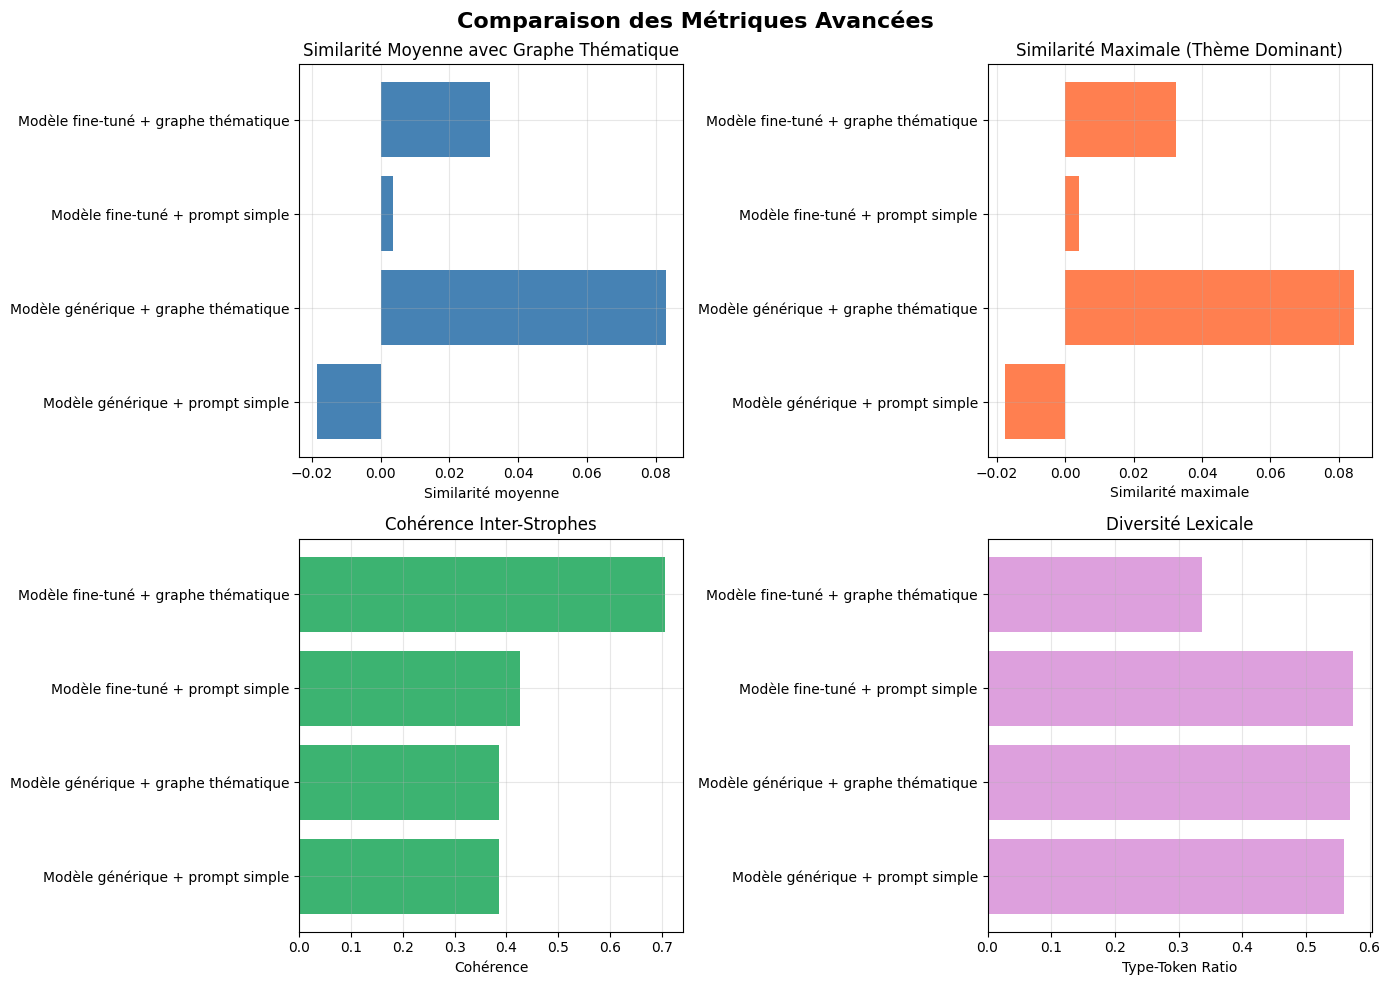

✓ Graphiques sauvegardés dans results/visualizations/metrics/comparison_metrics.png


In [ ]:
if 'df_comparison' in locals() and not df_comparison.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Comparaison des Métriques Avancées", fontsize=16, fontweight='bold')
    
    approaches = df_comparison["Approche"].values
    
    ax1 = axes[0, 0]
    ax1.barh(approaches, df_comparison["Similarité graphe (moy)"], color='steelblue')
    ax1.set_xlabel("Similarité moyenne")
    ax1.set_title("Similarité Moyenne avec Graphe Thématique")
    ax1.grid(True, alpha=0.3)
    
    ax2 = axes[0, 1]
    ax2.barh(approaches, df_comparison["Similarité graphe (max)"], color='coral')
    ax2.set_xlabel("Similarité maximale")
    ax2.set_title("Similarité Maximale (Thème Dominant)")
    ax2.grid(True, alpha=0.3)
    
    ax3 = axes[1, 0]
    ax3.barh(approaches, df_comparison["Cohérence globale"], color='mediumseagreen')
    ax3.set_xlabel("Cohérence")
    ax3.set_title("Cohérence Inter-Strophes")
    ax3.grid(True, alpha=0.3)
    
    ax4 = axes[1, 1]
    ax4.barh(approaches, df_comparison["Diversité lexicale"], color='plum')
    ax4.set_xlabel("Type-Token Ratio")
    ax4.set_title("Diversité Lexicale")
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    viz_dir = Path("results/visualizations/metrics")
    viz_dir.mkdir(parents=True, exist_ok=True)
    save_path = str(viz_dir / "comparison_metrics.png")
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"Graphiques sauvegardés dans {save_path}")
else:
    print("Données non disponibles pour la visualisation")


## 8. Analyse Détaillée par Métrique


In [ ]:
if 'results_comparison' in locals():
    print("=== Analyse Détaillée des Métriques d'Embeddings ===\n")
    
    for approach_name, data in results_comparison.items():
        metrics = data["new_metrics"]
        
        print(f"{data['description']}:")
        print(f"  Similarité moyenne avec graphe: {metrics.get('graph_mean_similarity', 0):.4f}")
        print(f"  Similarité maximale (thème dominant): {metrics.get('graph_max_similarity', 0):.4f}")
        print(f"  Similarité minimale: {metrics.get('graph_min_similarity', 0):.4f}")
        print(f"  Couverture des thèmes: {metrics.get('graph_coverage', 0):.2%}")
        print(f"  Cohérence consécutive: {metrics.get('mean_consecutive_similarity', 0):.4f}")
        print(f"  Cohérence globale: {metrics.get('overall_coherence', 0):.4f}")
        print(f"  Écart-type cohérence: {metrics.get('coherence_std', 0):.4f}")
        print()


=== Analyse Détaillée des Métriques d'Embeddings ===

Modèle générique + prompt simple:
  Similarité moyenne avec graphe: -0.0186
  Similarité maximale (thème dominant): -0.0176
  Similarité minimale: -0.0194
  Couverture des thèmes: 0.00%
  Cohérence consécutive: 0.3922
  Cohérence globale: 0.3865
  Écart-type cohérence: 0.2236

Modèle générique + graphe thématique:
  Similarité moyenne avec graphe: 0.0830
  Similarité maximale (thème dominant): 0.0845
  Similarité minimale: 0.0816
  Couverture des thèmes: 0.00%
  Cohérence consécutive: 0.4484
  Cohérence globale: 0.3847
  Écart-type cohérence: 0.2230

Modèle fine-tuné + prompt simple:
  Similarité moyenne avec graphe: 0.0037
  Similarité maximale (thème dominant): 0.0041
  Similarité minimale: 0.0031
  Couverture des thèmes: 0.00%
  Cohérence consécutive: 0.5548
  Cohérence globale: 0.4265
  Écart-type cohérence: 0.1604

Modèle fine-tuné + graphe thématique:
  Similarité moyenne avec graphe: 0.0319
  Similarité maximale (thème domina

## 9. Export des Résultats


In [ ]:
if 'results_comparison' in locals():
    from datetime import datetime
    
    output_data = {
        "timestamp": datetime.now().strftime("%Y%m%d_%H%M%S"),
        "config": existing_data["config"],
        "approaches": {}
    }
    
    for approach_name, data in results_comparison.items():
        output_data["approaches"][approach_name] = {
            "description": data["description"],
            "poem": data["poem"],
            "metrics": data["new_metrics"]
        }
    
    output_file = Path("results/comparison/comparison_enriched.json")
    output_file.parent.mkdir(parents=True, exist_ok=True)
    
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(output_data, f, ensure_ascii=False, indent=2)
    
    print(f"Résultats enrichis sauvegardés dans {output_file}")
else:
    print("Aucune donnée à sauvegarder")


Résultats enrichis sauvegardés dans results/comparison/comparison_enriched.json


## 10. Évaluation par LLM Juge (Gemini 3)


In [14]:

api_key = os.getenv("GOOGLE_API_KEY")

if not api_key:
    print("Clé API non disponible - impossible d'évaluer")
else:
    print("Clé API Google trouvée")
    
    try:
        print("\nÉvaluation d'un poème de test avec Gemini 3...")
        test_evaluation = evaluate_poem_with_gemini(
            poem_advanced,
            topic_graph,
            api_key
        )
        
        print("\n=== Résultats de l'évaluation LLM ===")
        print(f"Score global: {test_evaluation.get('overall_score', 'N/A')}/10")
        print(f"Qualité poétique: {test_evaluation.get('poetic_quality', 'N/A')}/10")
        print(f"Cohérence thématique: {test_evaluation.get('coherence_score', 'N/A')}/10")
        print(f"Adhérence aux thèmes: {test_evaluation.get('theme_adherence', 'N/A')}/10")
        print(f"Originalité: {test_evaluation.get('originality', 'N/A')}/10")
        print(f"Maîtrise de la langue: {test_evaluation.get('language_mastery', 'N/A')}/10")
        print(f"\nFeedback:\n{test_evaluation.get('feedback', 'N/A')}")
    except Exception as e:
        print(f"Erreur lors de l'évaluation: {e}")


Clé API Google trouvée

Évaluation d'un poème de test avec Gemini 3...

=== Résultats de l'évaluation LLM ===
Score global: 6/10
Qualité poétique: 5/10
Cohérence thématique: 8/10
Adhérence aux thèmes: 9/10
Originalité: 4/10
Maîtrise de la langue: 7/10

Feedback:
Ce poème aborde avec succès la majorité des thèmes demandés, tissant un lien entre l'exploration spatiale et la nostalgie terrestre. La cohérence thématique est donc forte. Sur le plan de la qualité poétique, le rythme est un peu heurté par endroits et la musicalité pourrait être améliorée par un travail sur la fluidité des vers et le choix des sonorités. Les images sont présentes mais manquent parfois d'originalité ("lueurs lointaines", "étoiles de l'émerveillement"). L'originalité est le point le plus faible, le poème reste dans des registres assez classiques de la poésie sur l'espace et l'infini. La maîtrise de la langue française est globalement bonne, avec quelques tournures qui gagneraient à être plus naturelles ("qui me 

In [15]:
if api_key:
    try:
        from src.evaluation.llm_judge import load_poems_from_results
        from datetime import datetime
        import json
        
        print("Chargement et évaluation de tous les poèmes depuis results/...")
        print("(Cela peut prendre plusieurs minutes selon le nombre de poèmes)\n")
        
        poems = load_poems_from_results(Path("results"))
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        print("Évaluation des poèmes de comparaison...")
        comparison_evaluations = []
        for poem_data in poems["comparison"]:
            topic_graph = None
            try:
                with open(poem_data["source_file"], "r", encoding="utf-8") as f:
                    source_data = json.load(f)
                    topic_graph = source_data.get("config", {}).get("topic_graph")
            except:
                pass
            
            evaluation = evaluate_poem_with_gemini(
                poem_data["poem"],
                topic_graph,
                api_key
            )
            
            comparison_evaluations.append({
                **poem_data,
                "llm_evaluation": evaluation
            })
        
        print(f"{len(comparison_evaluations)} poèmes de comparaison évalués")
        
        print("\nÉvaluation des poèmes itératifs...")
        iterative_evaluations = []
        for poem_data in poems["iterative"]:
            evaluation = evaluate_poem_with_gemini(
                poem_data["poem"],
                None,
                api_key
            )
            
            iterative_evaluations.append({
                **poem_data,
                "llm_evaluation": evaluation
            })
        
        print(f"{len(iterative_evaluations)} poèmes itératifs évalués")
        
        all_evaluations = {
            "timestamp": timestamp,
            "comparison_evaluations": comparison_evaluations,
            "iterative_evaluations": iterative_evaluations
        }
        
        output_dir = Path("results/evaluations")
        output_dir.mkdir(parents=True, exist_ok=True)
        output_file = output_dir / f"llm_evaluations_{timestamp}.json"
        with open(output_file, "w", encoding="utf-8") as f:
            json.dump(all_evaluations, f, ensure_ascii=False, indent=2)
        
        print(f"\nRésultats sauvegardés dans: {output_file}")
    except Exception as e:
        print(f"Erreur lors de l'évaluation batch: {e}")
        import traceback
        traceback.print_exc()
else:
    print("Clé API non disponible - impossible d'évaluer")


Chargement et évaluation de tous les poèmes depuis results/...
(Cela peut prendre plusieurs minutes selon le nombre de poèmes)

Évaluation des poèmes de comparaison...
16 poèmes de comparaison évalués

Évaluation des poèmes itératifs...
12 poèmes itératifs évalués

Résultats sauvegardés dans: results/evaluations/llm_evaluations_20260113_190803.json


## 11. Visualisation


=== Évaluations LLM (llm_evaluations_20260113_190803.json) ===

Comparaison des évaluations LLM (Comparaison + Itératif Final):
                                       Approche  Score global  Qualité poétique  Cohérence  Adhérence thèmes  Originalité  Maîtrise langue
               Modèle générique + prompt simple           6.0               5.0        8.0               9.0          5.0              7.0
           Modèle générique + graphe thématique           4.0               3.0        6.0               6.0          4.0              5.0
               Modèle fine-tuné + prompt simple           5.5               5.0        7.0               7.0          6.0              5.0
           Modèle fine-tuné + graphe thématique           3.0               2.0        6.0               7.0          3.0              3.0
               Modèle générique + prompt simple           6.0               5.0        7.0               7.0          5.0              6.0
           Modèle générique + graphe t

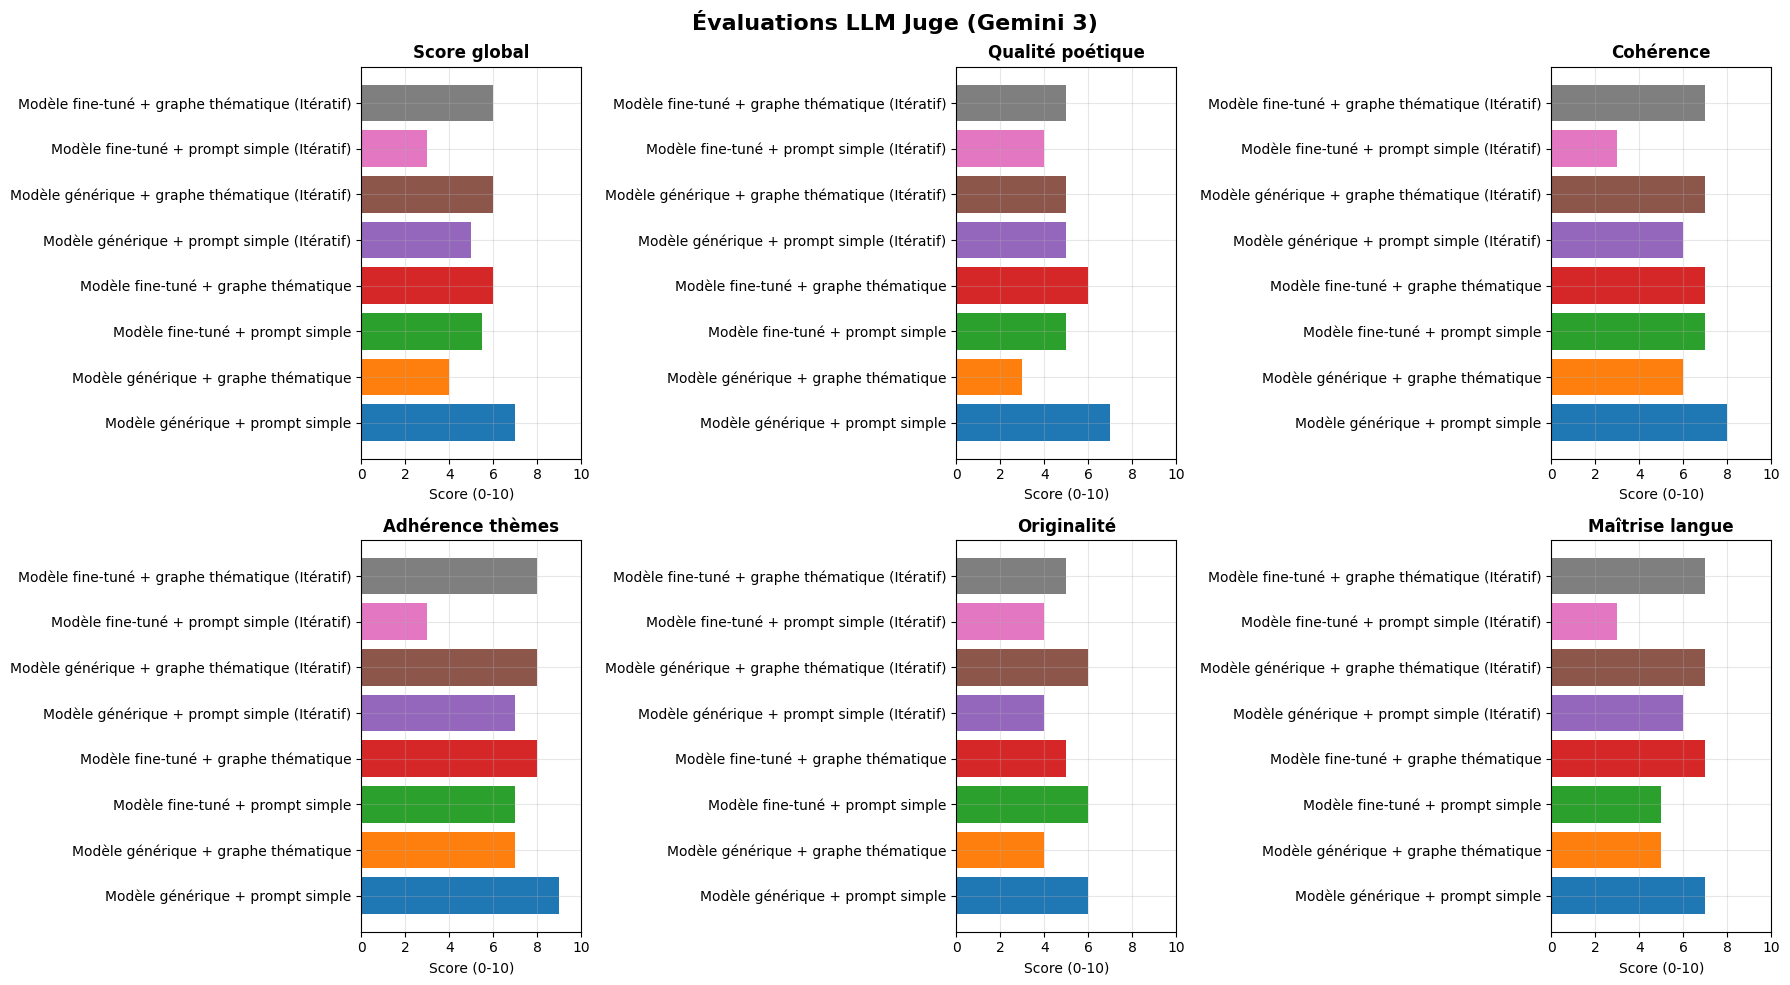


Graphiques sauvegardés dans results/visualizations/metrics/llm_evaluations.png


In [ ]:
evaluations_dir = Path("results/evaluations")
if evaluations_dir.exists():
    eval_files = sorted(evaluations_dir.glob("llm_evaluations_*.json"), 
                       key=lambda p: p.stat().st_mtime, reverse=True)
    
    if eval_files:
        latest_eval_file = eval_files[0]
        with open(latest_eval_file, "r", encoding="utf-8") as f:
            eval_data = json.load(f)
        
        print(f"=== Évaluations LLM ({latest_eval_file.name}) ===\n")
        
        all_eval_data = []
        
        if eval_data.get("comparison_evaluations"):
            for eval_item in eval_data["comparison_evaluations"]:
                llm_eval = eval_item.get("llm_evaluation", {})
                all_eval_data.append({
                    "Approche": eval_item.get("description", ""),
                    "Score global": llm_eval.get("overall_score", 0),
                    "Qualité poétique": llm_eval.get("poetic_quality", 0),
                    "Cohérence": llm_eval.get("coherence_score", 0),
                    "Adhérence thèmes": llm_eval.get("theme_adherence", 0),
                    "Originalité": llm_eval.get("originality", 0),
                    "Maîtrise langue": llm_eval.get("language_mastery", 0)
                })
        
        if eval_data.get("iterative_evaluations"):
            approach_names_map = {
                "baseline": "Modèle générique + prompt simple (Itératif)",
                "structure_only": "Modèle générique + graphe thématique (Itératif)",
                "specialization_only": "Modèle fine-tuné + prompt simple (Itératif)",
                "structure_specialization": "Modèle fine-tuné + graphe thématique (Itératif)"
            }
            
            for eval_item in eval_data["iterative_evaluations"]:
                if eval_item.get("version") == "final":
                    llm_eval = eval_item.get("llm_evaluation", {})
                    approach = eval_item.get("approach", "")
                    description = approach_names_map.get(approach, f"{approach} (Itératif)")
                    all_eval_data.append({
                        "Approche": description,
                        "Score global": llm_eval.get("overall_score", 0),
                        "Qualité poétique": llm_eval.get("poetic_quality", 0),
                        "Cohérence": llm_eval.get("coherence_score", 0),
                        "Adhérence thèmes": llm_eval.get("theme_adherence", 0),
                        "Originalité": llm_eval.get("originality", 0),
                        "Maîtrise langue": llm_eval.get("language_mastery", 0)
                    })
        
        if all_eval_data:
            df_llm_eval = pd.DataFrame(all_eval_data)
            print("Comparaison des évaluations LLM (Comparaison + Itératif Final):")
            print(df_llm_eval.to_string(index=False))
            
            fig, axes = plt.subplots(2, 3, figsize=(18, 10))
            fig.suptitle("Évaluations LLM Juge (Gemini 3)", fontsize=16, fontweight='bold')
            
            metrics_to_plot = ["Score global", "Qualité poétique", "Cohérence", 
                             "Adhérence thèmes", "Originalité", "Maîtrise langue"]
            
            approach_color_map = {
                "Modèle générique + prompt simple": "#1f77b4",
                "Modèle générique + graphe thématique": "#ff7f0e",
                "Modèle fine-tuné + prompt simple": "#2ca02c",
                "Modèle fine-tuné + graphe thématique": "#d62728",
                "Modèle générique + prompt simple (Itératif)": "#9467bd",
                "Modèle générique + graphe thématique (Itératif)": "#8c564b",
                "Modèle fine-tuné + prompt simple (Itératif)": "#e377c2",
                "Modèle fine-tuné + graphe thématique (Itératif)": "#7f7f7f"
            }
            
            bar_colors = [approach_color_map.get(approach, "#808080") for approach in df_llm_eval["Approche"]]
            
            for idx, metric in enumerate(metrics_to_plot):
                ax = axes[idx // 3, idx % 3]
                bars = ax.barh(df_llm_eval["Approche"], df_llm_eval[metric], color=bar_colors)
                ax.set_xlabel("Score (0-10)")
                ax.set_title(metric, fontweight="bold")
                ax.set_xlim(0, 10)
                ax.grid(True, alpha=0.3)
            
            plt.tight_layout()
            viz_dir = Path("results/visualizations/metrics")
            viz_dir.mkdir(parents=True, exist_ok=True)
            save_path = str(viz_dir / "llm_evaluations.png")
            plt.savefig(save_path, dpi=150, bbox_inches='tight')
            plt.show()
            print(f"\nGraphiques sauvegardés dans {save_path}")
        else:
            print("Aucune évaluation LLM trouvée")
    else:
        print("Aucun fichier d'évaluation LLM trouvé")
else:
    print("Dossier results/evaluations/ n'existe pas encore")
